<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_4X/blob/main/GQtest_cluster_groupwise_(y_hat)_0_1_0_9_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_4X/groupwise_0.1_0.9'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,59.926992,95.119049,49.834021,75.472962,-0.982039,289.370984,290.321287,-0.950303
1,0.0,1.0,27.085014,74.504250,91.444498,37.373024,0.206149,240.612934,240.331691,0.281243
2,0.0,2.0,98.462166,36.845148,50.811833,58.039064,0.484858,254.643068,254.458147,0.184921
3,0.0,3.0,28.011036,73.265199,87.781444,79.506959,0.321359,278.885996,278.623195,0.262801
4,0.0,4.0,33.799324,57.721307,85.653607,82.278242,-0.195383,269.257098,269.615707,-0.358609
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,58.086042,73.216721,65.859534,86.923670,0.800601,294.886568,293.548262,1.338306
29996,999.0,26.0,95.605706,32.363299,75.424248,85.995977,-1.185315,298.203915,299.097513,-0.893598
29997,999.0,27.0,34.738258,60.757883,91.962665,25.104464,-0.027596,222.535674,222.670233,-0.134559
29998,999.0,28.0,97.206441,22.526359,31.810270,22.089203,2.362119,185.994391,184.174731,1.819660


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    59.926992  95.119049  49.834021  75.472962 -0.982039  289.370984   
      1.0    27.085014  74.504250  91.444498  37.373024  0.206149  240.612934   
      2.0    98.462166  36.845148  50.811833  58.039064  0.484858  254.643068   
      3.0    28.011036  73.265199  87.781444  79.506959  0.321359  278.885996   
      4.0    33.799324  57.721307  85.653607  82.278242 -0.195383  269.257098   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   58.086042  73.216721  65.859534  86.923670  0.800601  294.886568   
      26.0   95.605706  32.363299  75.424248  85.995977 -1.185315  298.203915   
      27.0   34.738258  60.757883  91.962665  25.104464 -0.027596  222.535674   
      28.0   97.206441  22.526359  31.810270  22.089203  2.362119  185.994391   
      29.0   95.873727  84.314716  77.135478  77.763221 -1.632027  343.455116   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    290.321287 -0.950303  
      1.0    240.331691  0.281243  
      2.0    254.458147  0.184921  
      3.0    278.623195  0.262801  
      4.0    269.615707 -0.358609  
...                 ...       ...  
999.0 25.0   293.548262  1.338306  
      26.0   299.097513 -0.893598  
      27.0   222.670233 -0.134559  
      28.0   184.174731  1.819660  
      29.0   344.399087 -0.943971  

[30000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    59.926992  95.119049  49.834021  75.472962 -0.982039  289.370984   
      1.0    27.085014  74.504250  91.444498  37.373024  0.206149  240.612934   
      2.0    98.462166  36.845148  50.811833  58.039064  0.484858  254.643068   
      3.0    28.011036  73.265199  87.781444  79.506959  0.321359  278.885996   
      4.0    33.799324  57.721307  85.653607  82.278242 -0.195383  269.257098   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   58.086042  73.216721  65.859534  86.923670  0.800601  294.886568   
      26.0   95.605706  32.363299  75.424248  85.995977 -1.185315  298.203915   
      27.0   34.738258  60.757883  91.962665  25.104464 -0.027596  222.535674   
      28.0   97.206441  22.526359  31.810270  22.089203  2.362119  185.994391   
      29.0   95.873727  84.314716  77.135478  77.763221 -1.632027  343.455116   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    290.321287 -0.950303  
      1.0    240.331691  0.281243  
      2.0    254.458147  0.184921  
      3.0    278.623195  0.262801  
      4.0    269.615707 -0.358609  
...                 ...       ...  
999.0 25.0   293.548262  1.338306  
      26.0   299.097513 -0.893598  
      27.0   222.670233 -0.134559  
      28.0   184.174731  1.819660  
      29.0   344.399087 -0.943971  

[30000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,59.926992,95.119049,49.834021,75.472962,-0.982039,289.370984,290.321287,-0.950303
1,0.0,1.0,27.085014,74.504250,91.444498,37.373024,0.206149,240.612934,240.331691,0.281243
2,0.0,2.0,98.462166,36.845148,50.811833,58.039064,0.484858,254.643068,254.458147,0.184921
3,0.0,3.0,28.011036,73.265199,87.781444,79.506959,0.321359,278.885996,278.623195,0.262801
4,0.0,4.0,33.799324,57.721307,85.653607,82.278242,-0.195383,269.257098,269.615707,-0.358609
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,58.086042,73.216721,65.859534,86.923670,0.800601,294.886568,293.548262,1.338306
29996,999.0,26.0,95.605706,32.363299,75.424248,85.995977,-1.185315,298.203915,299.097513,-0.893598
29997,999.0,27.0,34.738258,60.757883,91.962665,25.104464,-0.027596,222.535674,222.670233,-0.134559
29998,999.0,28.0,97.206441,22.526359,31.810270,22.089203,2.362119,185.994391,184.174731,1.819660


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    59.926992  95.119049  49.834021  75.472962 -0.982039  289.370984   
      1.0    27.085014  74.504250  91.444498  37.373024  0.206149  240.612934   
      2.0    98.462166  36.845148  50.811833  58.039064  0.484858  254.643068   
      3.0    28.011036  73.265199  87.781444  79.506959  0.321359  278.885996   
      4.0    33.799324  57.721307  85.653607  82.278242 -0.195383  269.257098   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   58.086042  73.216721  65.859534  86.923670  0.800601  294.886568   
      26.0   95.605706  32.363299  75.424248  85.995977 -1.185315  298.203915   
      27.0   34.738258  60.757883  91.962665  25.104464 -0.027596  222.535674   
      28.0   97.206441  22.526359  31.810270  22.089203  2.362119  185.994391   
      29.0   95.873727  84.314716  77.135478  77.763221 -1.632027  343.455116   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    290.321287 -0.950303  
      1.0    240.331691  0.281243  
      2.0    254.458147  0.184921  
      3.0    278.623195  0.262801  
      4.0    269.615707 -0.358609  
...                 ...       ...  
999.0 25.0   293.548262  1.338306  
      26.0   299.097513 -0.893598  
      27.0   222.670233 -0.134559  
      28.0   184.174731  1.819660  
      29.0   344.399087 -0.943971  

[30000 rows x 8 columns]

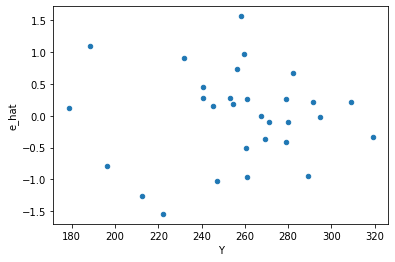

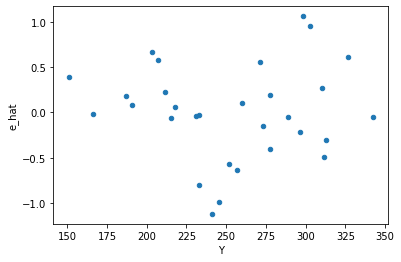

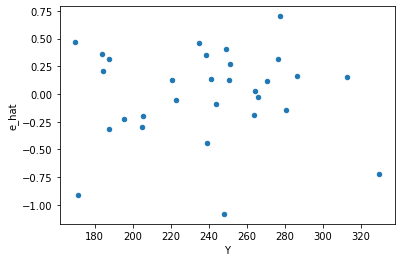

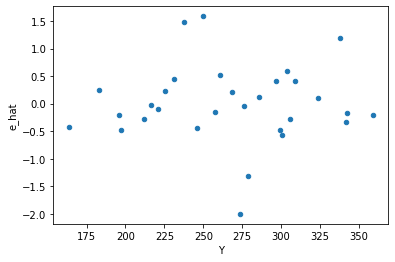

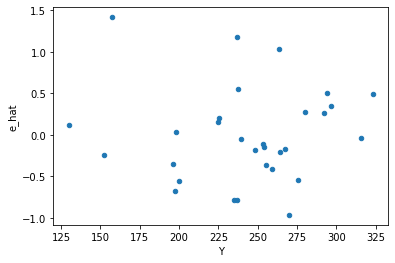

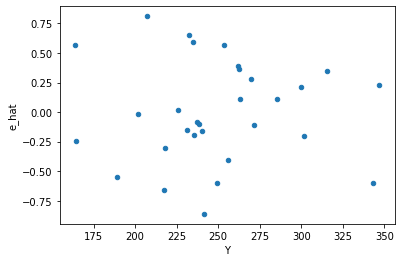

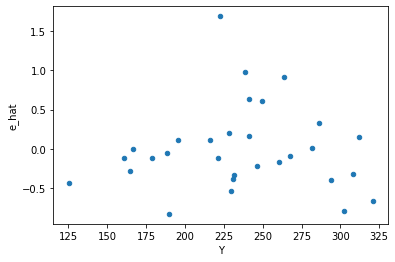

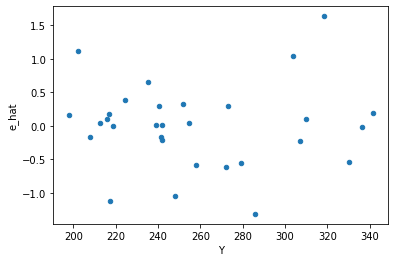

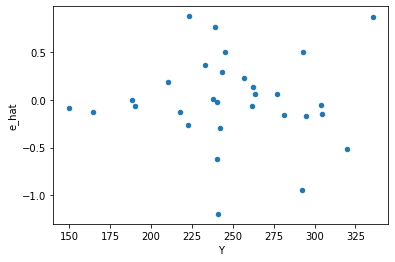

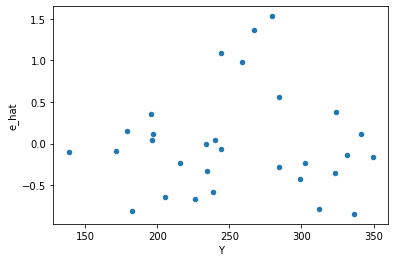

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew1.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew2.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew3.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew4.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew5.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew6.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew7.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew8.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew9.plot(x ='Y', y='e_hat', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,10.0,12.0,3.985653943897842,7.142586293614704,0.3985653943897842,0.5952155244678919,1.4933948928987804,0.5042878203222323,0.7478560898388839,0.25214391016111615,Reject001=1 : Homoscedasticity
6.0,7.0,15.0,1.398488800691449,3.7200977396419175,0.19978411438449273,0.24800651597612783,1.2413725522682404,0.6821563102077901,0.658921844896105,0.34107815510389505,Reject001=1 : Homoscedasticity
14.0,10.0,12.0,3.9429990578138874,6.708180482688601,0.39429990578138874,0.55901504022405,1.417740740049743,0.5594811268475472,0.7202594365762264,0.2797405634237736,Reject001=1 : Homoscedasticity
16.0,12.0,10.0,2.8758024419680948,5.374524427355223,0.23965020349734123,0.5374524427355223,2.2426538133170624,0.20991794902873306,0.8950410254856335,0.10495897451436653,Reject001=1 : Homoscedasticity
19.0,11.0,11.0,1.1905400638564632,3.093897302746621,0.1082309148960421,0.2812633911587837,2.5987343027539094,0.12829746924465946,0.9358512653776703,0.06414873462232973,Reject001=1 : Homoscedasticity
20.0,16.0,6.0,4.200145290198513,2.3230952658743576,0.2625090806374071,0.3871825443123929,1.4749300990741425,0.6607975291569308,0.6696012354215346,0.3303987645784654,Reject001=1 : Homoscedasticity
24.0,8.0,14.0,2.7999336239928163,11.053138830845699,0.34999170299910204,0.7895099164889785,2.2557960938034127,0.1750646029060028,0.9124676985469986,0.0875323014530014,Reject001=1 : Homoscedasticity
25.0,10.0,12.0,1.9614592724217186,8.65332551873685,0.19614592724217186,0.7211104598947374,3.6763978229556473,0.036492239797410564,0.9817538801012947,0.018246119898705282,Reject001=1 : Homoscedasticity
27.0,10.0,12.0,2.939132256857993,5.692678802602751,0.2939132256857993,0.4743899002168959,1.6140474764617458,0.42757399292586173,0.7862130035370691,0.21378699646293087,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,2.0,20.0,2.1801723365318972,7.731188469348919,1.0900861682659486,0.386559423467446,0.3546136394725238,0.5884670901814948,Reject001=1 : Homoscedasticity
1.0,12.0,10.0,3.52245845846702,2.158516311439165,0.2935382048722517,0.21585163114391648,0.7353442501219065,0.6057421712384977,Reject001=1 : Homoscedasticity
2.0,15.0,7.0,2.850555802386582,1.0609384901673535,0.1900370534924388,0.15156264145247908,0.7975425774453478,0.6708568793340558,Reject001=1 : Homoscedasticity
3.0,10.0,12.0,3.985653943897842,7.142586293614704,0.3985653943897842,0.5952155244678919,1.4933948928987804,0.5042878203222323,Reject001=1 : Homoscedasticity
4.0,3.0,19.0,1.8011057853894388,6.3035700711209826,0.6003685951298129,0.33176684584847277,0.5526052637325867,0.6948238452181014,Reject001=1 : Homoscedasticity
5.0,15.0,7.0,3.9897795871224213,0.4701249168591943,0.26598530580816143,0.06716070240845633,0.2524977919528199,0.024127662635692573,Reject001=1 : Homoscedasticity
6.0,7.0,15.0,1.398488800691449,3.7200977396419175,0.19978411438449273,0.24800651597612783,1.2413725522682404,0.6821563102077901,Reject001=1 : Homoscedasticity
7.0,7.0,15.0,5.1092821943871,4.150576790019802,0.7298974563410142,0.2767051193346534,0.3791013613361251,0.199037743337314,Reject001=1 : Homoscedasticity
8.0,13.0,9.0,3.4993613634846117,1.1241851725533027,0.26918164334497013,0.12490946361703364,0.46403410747052964,0.20231459248181008,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      919
Reject001=0 : Heteroscedasticity     81
Name: Result_test, dtype: int64